In [2]:
import pandas as pd
from datetime import datetime as dt
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\cavin\Documents\NSS_Projects\ACCR-project-clj\accre-carbonara\notebooks


In [4]:
df = pd.read_csv("../data/clean_df.csv", low_memory=False)

In [48]:
ce56 = pd.read_csv("../data/ce56.csv")

In [62]:
ce56

,END,USER,RETRY,TIME,RETURNCODE,COMMAND,JOBCOUNT,FAILED
0,2020-10-18 06:53:44,9204,0,20.038464,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
1,2020-10-18 06:54:04,9204,1,20.048906,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
2,2020-10-18 07:47:25,9204,0,20.082628,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
3,2020-10-18 07:47:45,9204,1,20.045221,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
4,2020-10-18 07:53:33,9204,0,20.041486,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
...,...,...,...,...,...,...,...,...
3291,2021-09-24 05:11:41,9204,0,20.046733,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
3292,2021-09-24 05:59:48,9204,0,20.045359,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
3293,2021-09-24 10:26:43,9204,0,20.026630,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1
3294,2021-09-24 13:29:48,9204,0,20.085085,1.0,"['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5...",0,1


In [5]:
# df = pd.read_csv('../data/ready_df.csv')

In [377]:
ce56['END'] = pd.to_datetime(ce56['END']).dt.floor('min')

In [379]:
df['END'] = pd.to_datetime(df['END']).dt.floor('D')
df['BEGIN'] = pd.to_datetime(df['BEGIN'])

In [443]:
df['END']

6643222   2020-10-01
6643280   2020-10-01
6643272   2020-10-01
6643296   2020-10-01
6643299   2020-10-01
             ...    
930031    2021-10-07
930032    2021-10-07
930033    2021-10-07
1494622   2021-10-07
1494623   2021-10-07
Name: END, Length: 7398530, dtype: datetime64[ns]

In [489]:
df = df[df['END'] > '2020-12-31']

In [491]:
df['date'] = df['END'].dt.date

C:\Users\cavin\AppData\Local\Temp\ipykernel_12856\2316732736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['END'].dt.date


In [492]:
ce56['date'] = ce56['END'].dt.date

In [493]:
slim_df = df[['END', 'JOBID', 'FAILED', 'date']]

In [494]:
slim_ce56 = ce56[['END', 'FAILED', 'date']]

In [497]:
df_count = slim_df.groupby('END')['FAILED'].value_counts().reset_index()

In [501]:
count_1 = df_count[df_count['FAILED'] == 1]

In [503]:
count_0 = df_count[df_count['FAILED'] == 0]

In [505]:
count_0

,END,FAILED,count
0,2021-01-01,0,10569
2,2021-01-02,0,14877
4,2021-01-03,0,15821
5,2021-01-04,0,14020
7,2021-01-05,0,16596
...,...,...,...
462,2021-10-03,0,1954
463,2021-10-04,0,618
464,2021-10-05,0,729
465,2021-10-06,0,281


In [507]:
counts = pd.concat([count_0, count_1])

In [509]:
value_counts = counts['END'].value_counts()

In [511]:
value_counts

END
2021-01-01    2
2021-09-03    2
2021-05-11    2
2021-05-12    2
2021-05-13    2
             ..
2021-05-25    1
2021-05-24    1
2021-05-23    1
2021-05-22    1
2021-10-07    1
Name: count, Length: 280, dtype: int64

In [513]:
counts = counts[counts['END'].isin(value_counts[value_counts > 1].index)]

In [515]:
counts[counts['END'] == '2020-10-18']

,END,FAILED,count


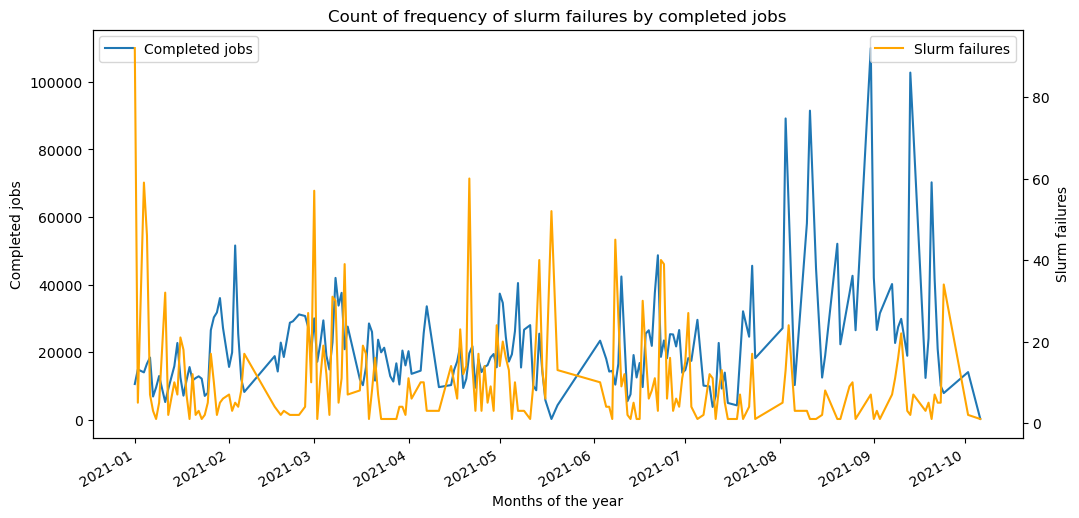

In [544]:
fig, ax1 = plt.subplots(figsize = (12,6))

(
    counts[counts['FAILED'] == 0]
    .plot(x = 'END', 
          y = 'count', 
          ax = ax1, 
          label ='Completed jobs')
)
ax2 = ax1.twinx()
(
    counts[counts['FAILED'] == 1]
    .plot(x = 'END', 
          y = 'count', 
          ax = ax2, 
          label ='Slurm failures',
          color='orange')
)
ax1.set_ylabel('Completed jobs')
ax2.set_ylabel('Slurm failures')
ax1.set_xlabel('Months of the year')
plt.title('Count of frequency of slurm failures by completed jobs')
plt.show();

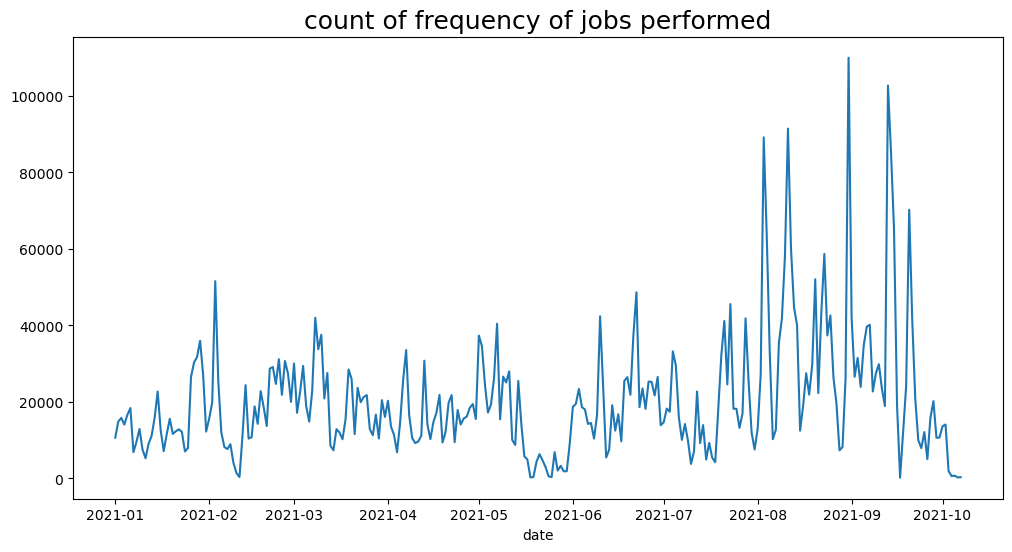

In [519]:
plt.figure(figsize = (12,6))
(
    df['date']
    .value_counts()
    .sort_index()
    .plot()
)

plt.title('count of frequency of jobs performed', fontsize = 18);

In [526]:
df = df.sort_values('END')

df['rolling_end'] = (
    df
    .rolling('30d', on = 'END')['JOBID']
    .count()
)

df['rolling_average'] = df['rolling_end'] / 30

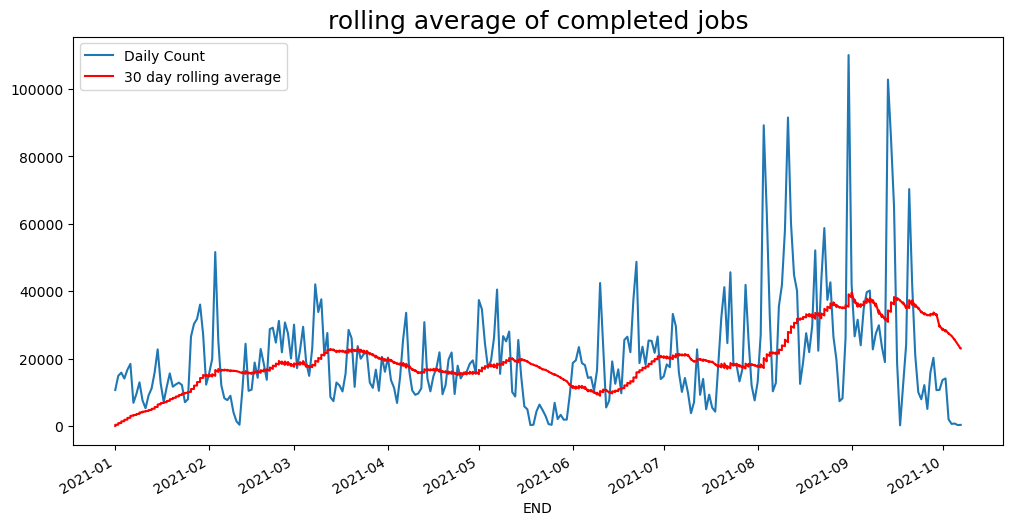

In [530]:
plt.figure(figsize = (12, 6))
(
    df['date']
    .value_counts()
    .sort_index()
    .plot(label = 'Daily Count')
)
(
    df
    .set_index('END')['rolling_average']
    .plot(color = 'red', label = '30 day rolling average')
)
plt.title('rolling average of completed jobs', fontsize = 18)
plt.legend();

In [524]:
df_fail = (
    df
    .groupby('FAILED')
    .rolling('30d', on = 'END')
    ['JOBID']
    .count()
    .reset_index()
    .set_index('END')
)
df_fail['rolling_avg'] = df_USEDMEM['JOBID'] / 30

NameError: name 'df_USEDMEM' is not defined

In [ ]:
plt.figure(figsize = 12, 6))

for fail, color in zip(['